In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
delivery = pd.read_csv("delivery_time.csv")

In [3]:
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [8]:
delivery.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [9]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


# histogram befor applying sqrt and log transformation

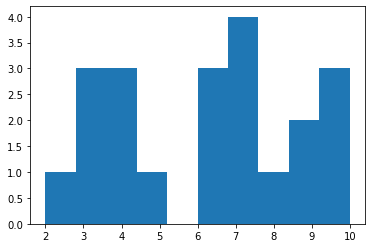

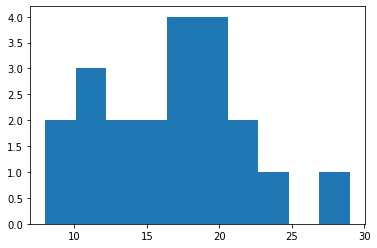

In [4]:
plt.figure("histogram for sorting time ")
plt.hist(delivery["Sorting Time"])
plt.figure("histogram for delivery time")
plt.hist(delivery["Delivery Time"])
plt.show()

In [5]:
## applying sqrt transformation 
log_delivery = np.log(delivery)

# histogram after applying log transformation

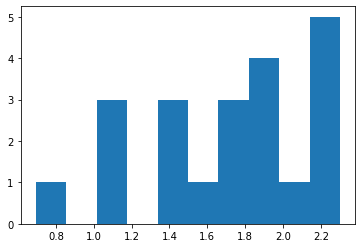

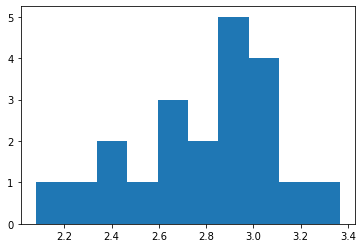

In [7]:
plt.figure("histogram for sorting time ")
plt.hist(log_delivery["Sorting Time"])
plt.figure("histogram for delivery time")
plt.hist(log_delivery["Delivery Time"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe95cf3b1c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe95cf3b760>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe95cf2efd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe95cf3bd00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe95cf3bfd0>,
 'means': []}

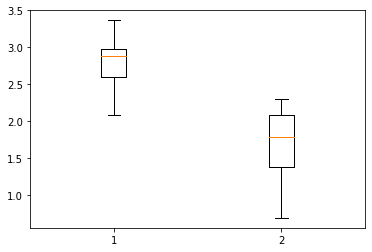

In [13]:
plt.boxplot(log_delivery)

In [14]:
sqrt_delivery = np.log(delivery)

# histogram after applying sqrt transformation

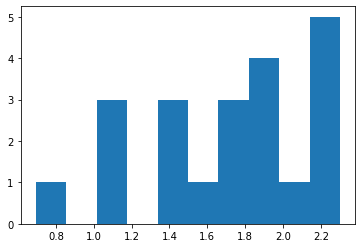

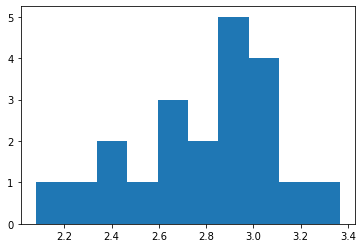

In [15]:
plt.figure("histogram for sorting time ")
plt.hist(sqrt_delivery["Sorting Time"])
plt.figure("histogram for delivery time")
plt.hist(sqrt_delivery["Delivery Time"])
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x7fe9494fe8b0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fe9494fe850>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fe9494fefd0>,
 'medians': [<matplotlib.lines.Line2D at 0x7fe95cf60970>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fe95cfec160>,
 'means': []}

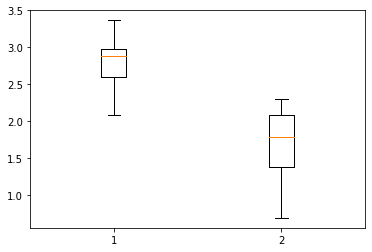

In [16]:
plt.boxplot(sqrt_delivery)

In [54]:
delivery.duplicated().sum()

0

In [21]:
y = log_delivery["Sorting Time"]
x1 = log_delivery["Delivery Time"]

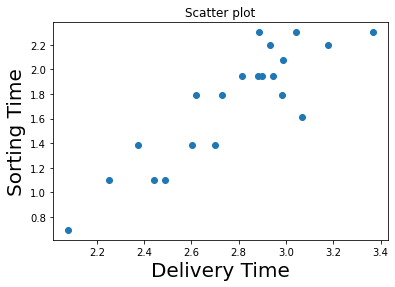

In [22]:
plt.scatter(x1,y)
plt.xlabel('Delivery Time',fontsize= 20)
plt.ylabel('Sorting Time',fontsize=20)
plt.title('Scatter plot')
plt.show()

In [23]:
log_delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.878727
Sorting Time,0.878727,1.000000


In [24]:
result = smf.ols("y~x1",data = log_delivery).fit()

In [25]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.760
Method:                 Least Squares   F-statistic:                     64.39
Date:                Wed, 04 Jan 2023   Prob (F-statistic):           1.60e-07
Time:                        23:13:31   Log-Likelihood:                 2.1913
No. Observations:                  21   AIC:                           -0.3826
Df Residuals:                      19   BIC:                             1.706
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8573      0.450     -4.131      0.001      -2.798      -0.916
x1             1.2923      0.161      8.024      0.000       0.955       1.629
==============================================================================
Omnibus:                        0.197   Durbin-Watson:                   1.365
Prob(Omnibus):                  0.906   Jarque-Bera (JB):                0.258
Skew:                          -0.192   Prob(JB):                        0.879
Kurtosis:                       2.617   Cond. No.                         28.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

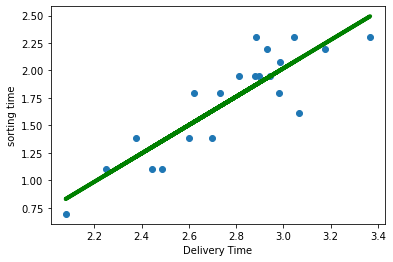

In [27]:
plt.scatter(x1,y)
yhat = 1.2923*x1-1.8573
fig = plt.plot(x1,yhat,lw=4,c="Green",label = "Regression")
plt.xlabel("Delivery Time")
plt.ylabel('sorting time')
plt.show()
